<a href="https://colab.research.google.com/github/bishalgupta1997/BigMart-Item_Outlet_Sales-/blob/master/Big_Mart_Item_Outlet_Sales_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem Statement

The Project is about predictive analytics.BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities.The problem statement is to predict the sales of each product at a particular store.The dataset has two parts:Training and Test.The training 8523 observations and the Test set has 5681 observations.We need to predict the sales for test set.

##Description of the variables
Variable : Description

Item_Identifier : Unique product ID

Item_Weight : Weight of product

Item_Fat_Content : Whether the product is low fat or not

Item_Visibility : The % of total display area of all products in a store allocated to the particular product

Item_Type : The category to which the product belongs

Item_MRP : Maximum Retail Price (list price) of the product

Outlet_Identifier : Unique store ID

Outlet_Establishment_Year : The year in which store was established

Outlet_Size : The size of the store in terms of ground area covered

Outlet_Location_Type : The type of city in which the store is located

Outlet_Type : Whether the outlet is just a grocery store or some sort of supermarket

Item_Outlet_Sales : Sales of the product in the particulat store. This is the outcome variable to be predicted

##Workflow
1.Data Understanding:- Understanding the attributes of the data and the data dictionary, data quality check Data Exploration and hypothesis Understandinng the data through descriptive analytics which includes visualizing the attributes, checking for the redundant data and checking the relationships between the variables. Hypothesis involves understanding the problem and making some hypothesis about what factors could potentially affect the outcome of the problem statement. This step should be done before looking at the data.

2.Data cleaning:- checking and deleting redundant data. Finding out the missing data.

3.Data preparation:- computing values for missing data. generating any derived attributes if necessary.

4.Modelling:- Selecting the technique to predict, building the model using the variables as per their importance. 

5.Evaluation:- Assessing the model using the test data which will comprise 30 % of the total data.The model performance will be evaluated on the basis of its prediction of the sales for the test data. Big Mart will use Root Mean Square Error (RMSE) value to judge your response.


#Step 1
Import libray
#Step 2
Import Dataset
#Step 3
Data Exploration
#Step 4
Data Cleaning
#Step 5
Data Preprocessing
#Step 6
Data Modeling


In [0]:
#import the needed libray
#Data Exploration
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import matplotlib
import warnings 
from scipy.stats import mode 
from sklearn.impute import SimpleImputer
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix  
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn import utils

In [0]:
#import the dataset 
train = pd.read_csv("Train.csv") 

#Data Exploration

In [0]:
#See the DataSet Identifier
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [0]:
#Information about the DataSet Columns 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [0]:
#describe the values(like mean,median etc)of the numeric column
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [0]:
#check for the duplicates value
idsUnique = len(set(train.Item_Identifier))
idsTotal = train.shape[0]
idsDupli = idsTotal - idsUnique

Text(0.5, 1.0, 'Item_Outlet_Sales Distribution')

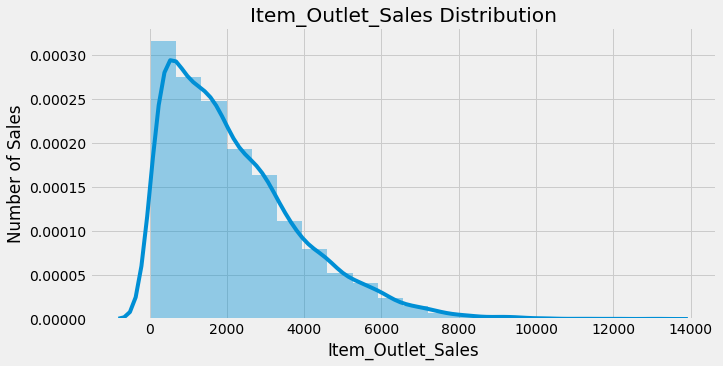

In [0]:
#plot a diagram to shaw the sales rate of Item_Outlet_Sales
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,5))
sns.distplot(train.Item_Outlet_Sales, bins = 20)
plt.ticklabel_format(style='plain', axis='x', scilimits=(0,1))
plt.xlabel("Item_Outlet_Sales")
plt.ylabel("Number of Sales")
plt.title("Item_Outlet_Sales Distribution")

In [0]:
#Print the skew and kurtosis value
print ("Skew is:", train.Item_Outlet_Sales.skew())
print("Kurtosis: %f" % train.Item_Outlet_Sales.kurt())

Skew is: 1.1775306028542798
Kurtosis: 1.615877


In [0]:
#Describe the integer Value Columns
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [0]:
train.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [0]:
categorical_columns = [x for x in train.dtypes.index if train.dtypes[x]=='object']

In [0]:
categorical_columns = [x for x in categorical_columns if x not in ['Item_Identifier','Outlet_Identifier','source']]

In [0]:
#Informtion about the Columns Varibles
for col in categorical_columns:
    print ('\nFrequency of Categories for varible %s'%col)
    print (train[col].value_counts())


Frequency of Categories for varible Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Frequency of Categories for varible Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Frequency of Categories for varible Outlet_Size
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Frequency of Categories for varible Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

F

In [0]:
item_avg_weight = train.pivot_table(values='Item_Weight', index='Item_Identifier')

In [0]:
outlet_size_mode = train.pivot_table(values="Outlet_Size", columns="Outlet_Type",aggfunc=lambda x:x.mode())

##2.1. Compare Item_Outlet_Sales vs Item_Visibility

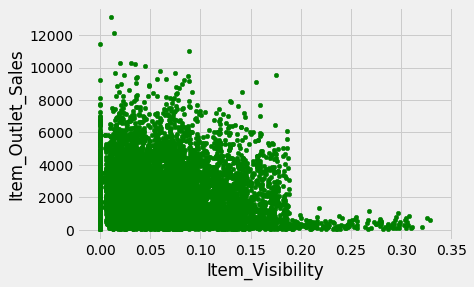

In [0]:
#Plot a scatter Diagram Between Item_Visibility and Item_Outlet_Sales
train.plot(kind='scatter',x='Item_Visibility',y='Item_Outlet_Sales',color='green')
plt.show()

In the above diagram we can see that when Iem_Vsibility is 0.00 to 0.20 the Item_Outlet_Sales is maximum.

##2.2. Comparison to Item_Outlet_Sales vs Item_Type

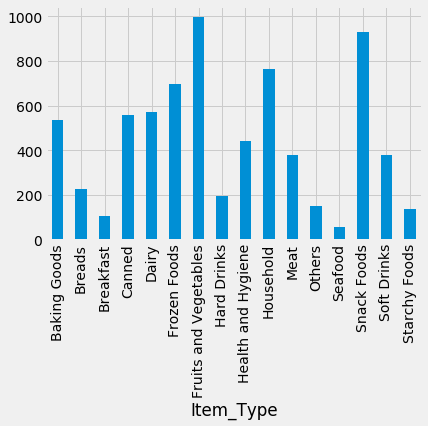

In [0]:
#Plot a Bar Chart Between Item_Type and Item_Outlet_Sales
train.groupby('Item_Type')['Item_Outlet_Sales'].nunique().plot(kind='bar')
plt.show()

In the above diagram we can see that  the Fruits and Vagetables are maximum sale and the sale of seefood is minimum.

##2.3. 

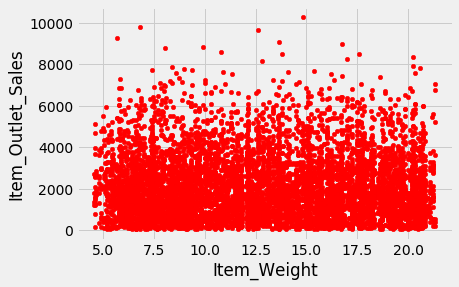

In [0]:
#Plot a scatter Diagram Between Item_Weight and Item_Outlet_Sales
train.plot(kind='scatter',x='Item_Weight',y='Item_Outlet_Sales',color='red')
plt.show()

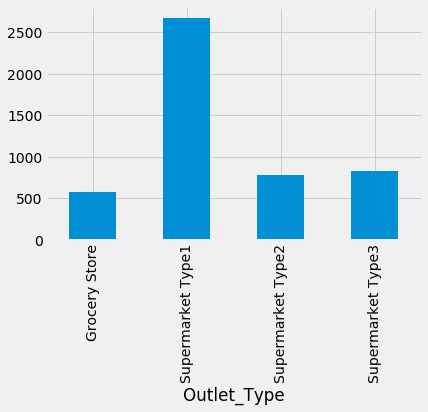

In [0]:
#Plot a Bar Chart Between Outlet_Type and Item_Outlet_Sales
train.groupby('Outlet_Type')['Item_Outlet_Sales'].nunique().plot(kind='bar')
plt.show()

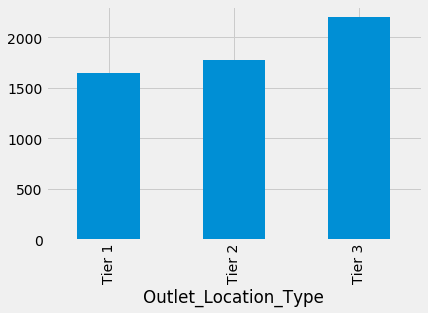

In [0]:
#Plot a Bar Chart Between Outlet_Location_Type and Item_Outlet_Sales
train.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].nunique().plot(kind='bar')
plt.show()

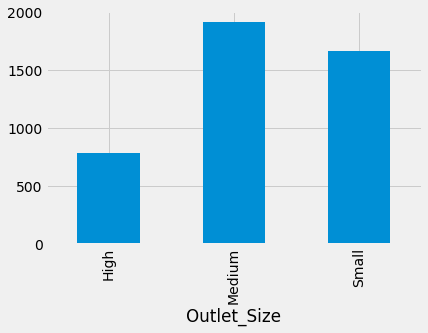

In [0]:
#Plot a Bar Chart Between Outlet_Size and Item_Outlet_Sales
train.groupby('Outlet_Size')['Item_Outlet_Sales'].nunique().plot(kind='bar')
plt.show()

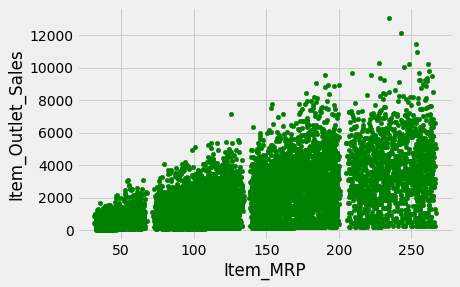

In [0]:
#Plot a scatter Diagram Between Item_MRP and Item_Outlet_Sales
train.plot(kind='scatter',x='Item_MRP',y='Item_Outlet_Sales',color='green')
plt.show()

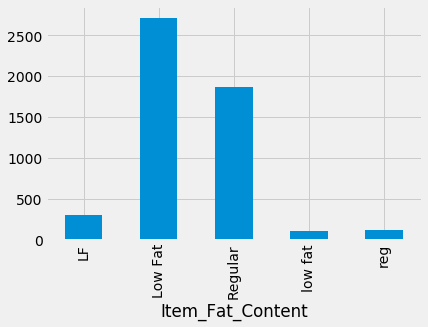

In [0]:
#Plot a Bar Chart Between Item_Fat_Content and Item_Outlet_Sales
train.groupby('Item_Fat_Content')['Item_Outlet_Sales'].nunique().plot(kind='bar')
plt.show()

In [0]:
train

#Data Cleaning

In [0]:
#Check the Item_Weight missing Value
miss_bool = train['Item_Weight'].isnull()

In [0]:
train.isnull().sum()/train.shape[0]*100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [0]:
#Located the column in X and Y axis 
#X is Independent Varieble and Y is Dependent Varieble
X= train.iloc[:, :-1].values
Y= train.iloc[:, :12].values

In [0]:
#Delete the Item_Identifier Columns
del train['Item_Identifier']

In [0]:
#Dlete the Outlet_Identifier
del train['Outlet_Identifier']

In [0]:
#Delete the Item_Identifier Columns
del train['Item_Fat_Content']

In [0]:
#Delete the Item_Identifier Columns
del train['Outlet_Establishment_Year']

In [0]:
#Delete the Item_Identifier Columns
del train['Outlet_Size']

In [0]:
#Delete the Item_Identifier Columns
del train['Item_Type']

In [0]:
#Delete the Item_Identifier Columns
del train['Item_Visibility']

In [0]:
#For Showing the table
train

#Data Preprocessing

In [6]:
#For showing the total null Value 
train.isnull().sum()

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
# for column Item_Weight
train["Item_Weight"].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [13]:
#For Showing the mode value in Outlet_Size 
train.loc[:,"Outlet_Size"].mode()

0    Medium
dtype: object

In [0]:
#Fulfill the Nan Value in Item_Weight using Mean Value
train["Item_Weight"].fillna(train["Item_Weight"].mean(), inplace=True)

In [15]:
# For total varieble in Outlet_Size
train["Outlet_Size"].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [0]:
#Fulfill the Nan Value in Outlet_Size using Mode Value
train["Outlet_Size"].fillna(train["Outlet_Size"].mode()[0], inplace=True)

In [17]:
print("Is the there any Null value in data: {}".format(train.isnull().sum().any()))

Is the there any Null value in data: False


In [0]:
#Using lebel encoder for Categorical Varieble
label_encoder = LabelEncoder() 

In [0]:
train['Item_Fat_Content']= label_encoder.fit_transform(train['Item_Fat_Content'])

In [0]:
train['Item_Type']= label_encoder.fit_transform(train['Item_Type'])

In [0]:
train['Outlet_Size']= label_encoder.fit_transform(train['Outlet_Size'])

In [0]:
train['Outlet_Location_Type']= label_encoder.fit_transform(train['Outlet_Location_Type'])

In [0]:
train['Outlet_Type']= label_encoder.fit_transform(train['Outlet_Type'])

In [24]:
train.head

<bound method NDFrame.head of       Item_Weight  Item_Fat_Content  ...  Outlet_Type  Item_Outlet_Sales
0        9.300000                 1  ...            1          3735.1380
1        5.920000                 2  ...            2           443.4228
2       17.500000                 1  ...            1          2097.2700
3       19.200000                 2  ...            0           732.3800
4        8.930000                 1  ...            1           994.7052
5       10.395000                 2  ...            2           556.6088
6       13.650000                 2  ...            1           343.5528
7       12.857645                 1  ...            3          4022.7636
8       16.200000                 2  ...            1          1076.5986
9       19.200000                 2  ...            1          4710.5350
10      11.800000                 1  ...            1          1516.0266
11      18.500000                 2  ...            1          2187.1530
12      15.100000    

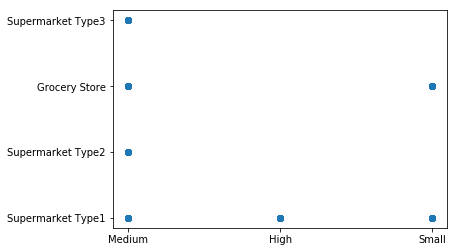

In [0]:
#filling value of Outlet_Size.
#Hypothesis: Outlet_Size depends on Oulet Type and Outlet__Location_Type
plt.scatter(train['Outlet_Size'],train['Outlet_Type'])
plt.show()

In [0]:
#From above plot and table we can assume that Glacceray shops are of small size
#SO map Glocessary Shop and Size

In [0]:
d={'Grocery Store':'Small'}
s=train.Outlet_Type.map(d)
train.Outlet_Size=train.Outlet_Size.combine_first(s)

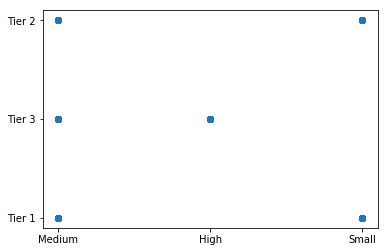

In [0]:
plt.scatter(train['Outlet_Size'],train['Outlet_Location_Type'])
plt.show()

In [0]:
twowaytable=pd.crosstab(train['Outlet_Size'],train['Outlet_Location_Type'])
twowaytable

Outlet_Location_Type,Tier 1,Tier 2,Tier 3
Outlet_Size,,,
High,0,0,932
Medium,930,1855,2418
Small,1458,930,0


In [0]:
#From plot and table we conclude that Tier 2 is of size small .
#So map Tier 2 and Size
d={'Tier 2':'Small'}
s=train.Outlet_Location_Type.map(d)
train.Outlet_Size=train.Outlet_Size.combine_first(s)

In [0]:
d={'Tier 2':'Small'}
s=train.Outlet_Location_Type.map(d)
train.Outlet_Size=train.Outlet_Size.combine_first(s)

In [0]:
train.Outlet_Size.isnull().any()

False

In [0]:
train.Item_Weight.isnull().sum()

4

In [0]:
train.Item_Visibility.isnull().any()

False

In [0]:
train.dtypes

Item_Weight                  float64
Item_Fat_Content               int64
Item_Visibility              float64
Item_Type                      int64
Item_MRP                     float64
Outlet_Establishment_Year      int64
Outlet_Size                    int64
Outlet_Location_Type           int64
Outlet_Type                    int64
Item_Outlet_Sales            float64
dtype: object

In [0]:
train['Item_Visibility'].describe()

count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

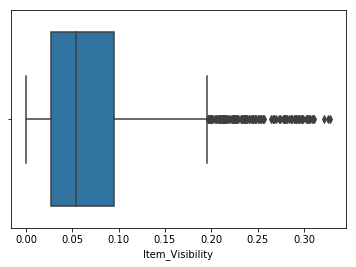

In [0]:
sns.boxplot(train['Item_Visibility'])

In [0]:
train["Item_Visibility"] = np.where(train["Item_Visibility"] >0.19, 0.19,train["Item_Visibility"])

In [26]:
train['Item_Visibility'].describe()

count    8523.000000
mean        0.065201
std         0.048563
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.190000
Name: Item_Visibility, dtype: float64

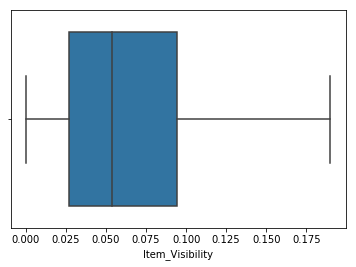

In [27]:
sns.boxplot(train['Item_Visibility'])

#Data Modeling

In [0]:
#Describe the data in the train dataset
train.describe()

,Item_Weight,Item_MRP,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,140.992782,1.112871,1.201220,2181.288914
std,4.226124,62.275067,0.812757,0.796459,1706.499616
min,4.555000,31.290000,0.000000,0.000000,33.290000
25%,9.310000,93.826500,0.000000,1.000000,834.247400
50%,12.857645,143.012800,1.000000,1.000000,1794.331000
75%,16.000000,185.643700,2.000000,1.000000,3101.296400
max,21.350000,266.888400,2.000000,3.000000,13086.964800


In [0]:
#Fixed the varieble in X and y axix
X = train.iloc[:,:-1]
y = train["Item_Outlet_Sales"]

In [0]:
#split the data in train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [0]:
#Import the sklearn for LinearRegression
from sklearn.linear_model import LinearRegression

In [0]:
regressor=LinearRegression()

In [31]:
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
#The adjusted r^2 value for test dataset
regressor.score(X_test,y_test)

0.5081747657972289

In [0]:
#The adjusted r^2 value for train dataset
regressor.score(X_train,y_train)

0.5061322406830362

In [0]:
y_pred=regressor.predict(X_test)

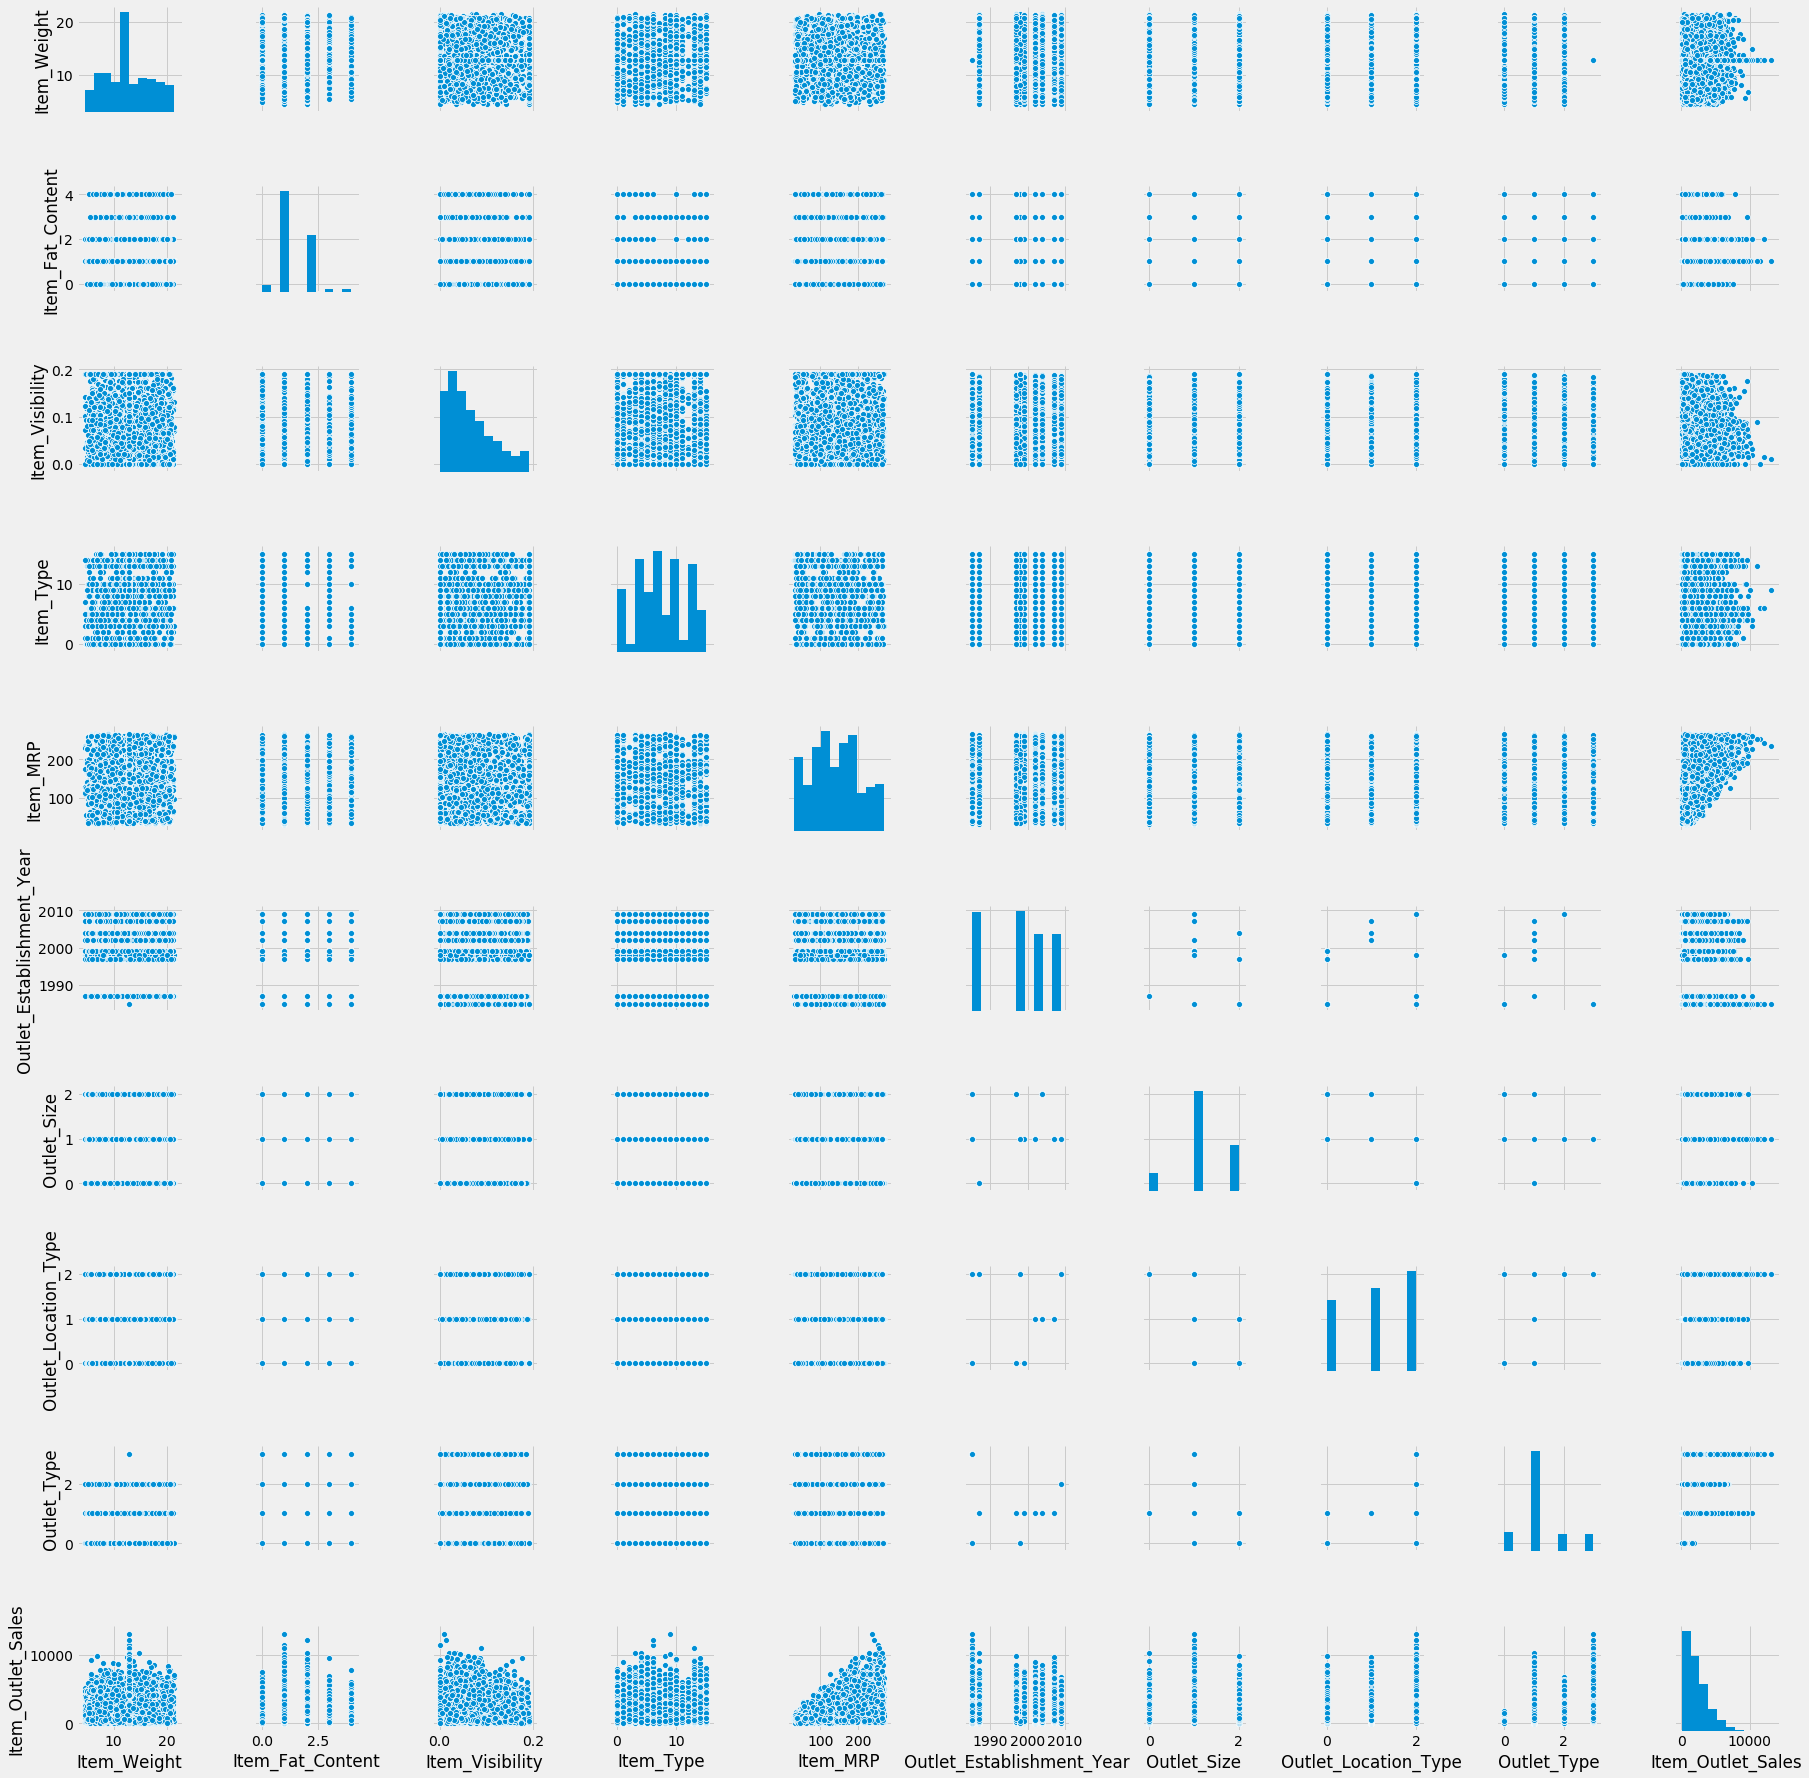

In [0]:
sns.pairplot(train)

In [0]:
train.corr()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Weight,1.000000,-0.017331,-0.011799,0.028015,0.024756,-0.008301,-0.007225,0.004088,-0.000566,0.011550
Item_Fat_Content,-0.017331,1.000000,0.037075,-0.115958,-0.000876,-0.000189,-0.012058,-0.004102,-0.004214,0.009800
Item_Visibility,-0.011799,0.037075,1.000000,-0.036272,-0.001177,-0.062727,0.060680,-0.023579,-0.155388,-0.116233
Item_Type,0.028015,-0.115958,-0.036272,1.000000,0.032651,0.004970,-0.001859,0.003084,0.003053,0.017048
Item_MRP,0.024756,-0.000876,-0.001177,0.032651,1.000000,0.005020,0.006059,0.000232,-0.001975,0.567574
Outlet_Establishment_Year,-0.008301,-0.000189,-0.062727,0.004970,0.005020,1.000000,0.193389,-0.089216,-0.122304,-0.049135
Outlet_Size,-0.007225,-0.012058,0.060680,-0.001859,0.006059,0.193389,1.000000,-0.614311,-0.201483,-0.086182
Outlet_Location_Type,0.004088,-0.004102,-0.023579,0.003084,0.000232,-0.089216,-0.614311,1.000000,0.467219,0.089367
Outlet_Type,-0.000566,-0.004214,-0.155388,0.003053,-0.001975,-0.122304,-0.201483,0.467219,1.000000,0.401522
Item_Outlet_Sales,0.011550,0.009800,-0.116233,0.017048,0.567574,-0.049135,-0.086182,0.089367,0.401522,1.000000


In [0]:
predictions = regressor.predict(X_test)

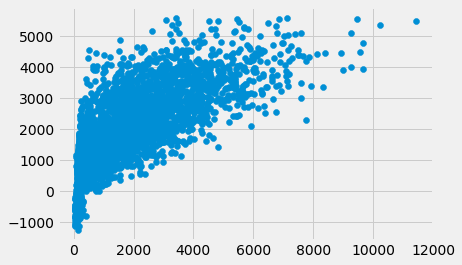

In [0]:
plt.scatter(y_test,predictions)

In [0]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=1/4,random_state=0)

In [26]:
#fitting simple linear regression to the training set
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
#predict the test result
y_pred=regressor.predict(X_train)

In [31]:
rss=((y_test-y_pred)**2).sum()
mse=np.mean((y_test-y_pred)**2)
print("Final rmse value is =",np.sqrt(np.mean((y_test-y_pred)**2)))

Final rmse value is = 1216.2804362425404


In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
lr1 = LinearRegression()
lr1.fit(train[["Item_MRP"]+["Item_Weight"]+["Outlet_Establishment_Year"]+["Item_Visibility"]+["Outlet_Location_Type"]+["Outlet_Type"]
             +["Item_Fat_Content"]+["Item_Type"]+["Outlet_Size"]], train[["Item_Outlet_Sales"]])
predictions1 = lr1.predict(train[["Outlet_Size"]+["Item_Type"]+["Item_Fat_Content"]+["Outlet_Type"]+["Outlet_Location_Type"]+["Item_Visibility"]
                               +["Outlet_Establishment_Year"]+["Item_Weight"]+["Item_MRP"]])

In [0]:
import statsmodels.formula.api as sm

In [35]:
model2 = sm.ols(formula='Item_Outlet_Sales = Item_MRP'+'Item_Weight'+'Outlet_Establishment_Year'+'Item_Visibility'+
    'Outlet_Location_Type'+'Outlet_Type'+'Item_Fat_Content'+'Item_Type'+'Outlet_Size', data=train)
fitted2 = model2.fit()
fitted2.summary()

PatsyError: ignored

In [39]:
model = LinearRegression()
X, y = train[['Item_MRP','Item_Weight','Outlet_Establishment_Year','Item_Visibility',
    'Outlet_Location_Type','Outlet_Type','Item_Fat_Content','Item_Type','Outlet_Size']], train.Item_Outlet_Sales
model.fit(X, y)
model.score(X, y)

0.5075740093632675

In [42]:
model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

print('Parameters: ', results.params)
print('R2: ', results.rsquared)

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     4114.
Date:                Fri, 21 Jun 2019   Prob (F-statistic):               0.00
Time:                        06:13:46   Log-Likelihood:                -72505.
No. Observations:                8523   AIC:                         1.450e+05
Df Residuals:                    8514   BIC:                         1.451e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Item_MRP              

In [0]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
X, y = train[['Item_MRP','Item_Weight','Outlet_Establishment_Year','Item_Visibility',
    'Outlet_Location_Type','Outlet_Type','Item_Fat_Content','Item_Type','Outlet_Size']], train.Item_Outlet_Sales
model.fit(X, y)
model.score(X, y)

0.5075740093632675

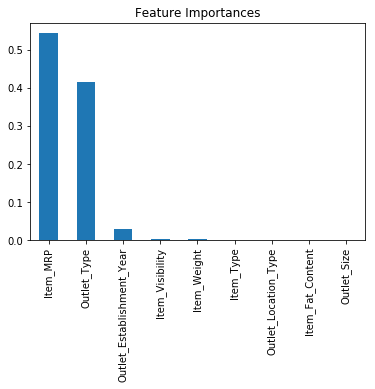

In [0]:
from sklearn.tree import DecisionTreeRegressor
target = 'Item_Outlet_Sales'
IDcol = ['Item_Identifier','Outlet_Identifier']
from sklearn import metrics
def modelfit(alg, train, predictors, target,  IDcol, filename):
    alg.fit(train[predictors], train[target])
predictors = [x for x in train.columns if x not in [target]+IDcol]
alg3 = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
modelfit(alg3, train, predictors, target, IDcol, 'alg3.csv')
coef3 = pd.Series(alg3.feature_importances_, predictors).sort_values(ascending=False)
coef3.plot(kind='bar', title='Feature Importances')

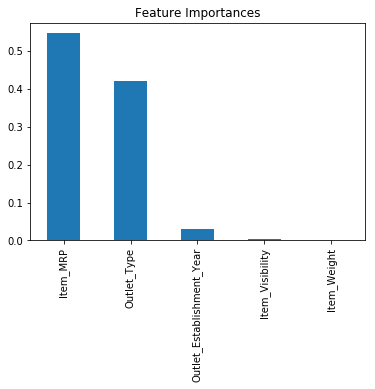

In [0]:
predictors = ['Item_MRP','Outlet_Type','Outlet_Establishment_Year','Item_Visibility','Item_Weight']
alg4 = DecisionTreeRegressor(max_depth=8, min_samples_leaf=150)
modelfit(alg4, train, predictors, target, IDcol, 'alg4.csv')
coef4 = pd.Series(alg4.feature_importances_, predictors).sort_values(ascending=False)
coef4.plot(kind='bar', title='Feature Importances')